In [19]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [20]:
bucketCount = 100 #aggregate probabilities to the nearest 1/bucketCount 
a_dist = np.zeros(bucketCount,dtype=float)
a_dist.fill(1/bucketCount)
labels = np.arange(1,bucketCount+1) 

In [21]:
#input string of independent binary observations of variable
events = "101000000" 

In [22]:
def posterior(a_prob, b_prob, ba_prob): #bayes theorem
  return ba_prob * a_prob / b_prob

0.5049999999999999
0.67
0.24626865671641793
0.5999600000000002
0.3333888925928394
0.4285714428557145
0.5000000000000001
0.5555555659155562
0.6000000167832013
2.3333326802333603


<BarContainer object of 100 artists>

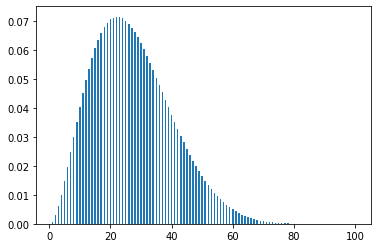

In [23]:
for char in events:
  ev = 0
  for i in range(bucketCount):
    ev += ((i+1)/bucketCount) * a_dist[i]
  print(ev)
  for i in range(bucketCount):
    a_dist[i] = posterior(a_dist[i],ev,(int(char)*(i+1)/bucketCount)+(1-int(char))*(1-(i+1)/bucketCount))
print(a_dist.sum())
plt.bar(labels,a_dist,width=0.5)


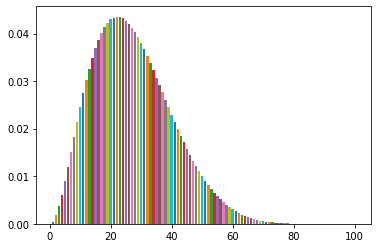

In [24]:
for i in range(1,bucketCount+1):
  prev_posterior = 1/bucketCount #prior before observation of any events
  for char in events: #update using previous posterior as prior
    prev_posterior = posterior(prev_posterior,1/2,(int(char) * i/bucketCount) + (1-int(char))*(1-i/bucketCount)) 
  plt.bar(i,prev_posterior)

plt.show()
